In [1]:
from arquivos import central
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pandas as pd
import math

In [2]:
robot = central.Central()
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\Data_D1_3k_icmarkets.csv', drop=True, drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [3]:
robot.get_normal_data()

EURCHF_Open  EURCHF_Close  EURCHF_High  EURCHF_Low  EURGBP_Open  \
0         1.14620       1.14167      1.15173     1.13983      0.88087   
1         1.14168       1.16869      1.17343     1.13951      0.87563   
2         1.16986       1.17044      1.17108     1.16874      0.87220   
3         1.17046       1.18584      1.19403     1.16999      0.86749   
4         1.18636       1.18441      1.18961     1.17522      0.87208   
...           ...           ...          ...         ...          ...   
2995      1.10884       1.10550      1.10940     1.10485      0.85036   
2996      1.10563       1.10527      1.10871     1.10433      0.84904   
2997      1.10538       1.10256      1.10561     1.10222      0.85863   
2998      1.10302       1.10098      1.10405     1.10040      0.86376   
2999      1.10101       1.09985      1.10184     1.09917      0.86760   

      EURGBP_Close  EURGBP_High  EURGBP_Low  EURJPY_Open  EURJPY_Close  ...  \
0          0.87562      0.88222     0.87368      111.043       111.360  ...   
1          0.87221      0.88072     0.86994      111.359       111.096  ...   
2          0.86750      0.87428     0.86618      111.140       111.150  ...   
3          0.87369      0.87440     0.86533      111.154       111.685  ...   
4          0.87200      0.87255     0.87146      111.668       110.772  ...   
...            ...          ...         ...          ...           ...  ...   
2995       0.84888      0.85106     0.84713      130.079       130.085  ...   
2996       0.85861      0.85905     0.84851      130.094       130.286  ...   
2997       0.86363      0.86630     0.85813      130.300       130.334  ...   
2998       0.86754      0.86817     0.86209      130.341       130.161  ...   
2999       0.86789      0.86968     0.86458      130.160       130.466  ...   

      AUDNZD_High  AUDNZD_Low  NZDCAD_Open  NZDCAD_Close  NZDCAD_High  \
0         1.26220     1.24938      0.81814       0.81822      0.82062   
1         1.26104     1.25190      0.81822       0.82315      0.82831   
2         1.26627     1.25226      0.82444       0.82450      0.82584   
3         1.27250     1.25705      0.82450       0.82797      0.82827   
4         1.26923     1.26621      0.82806       0.83368      0.83702   
...           ...         ...          ...           ...          ...   
2995      1.08433     1.08159      0.88353       0.88284      0.88557   
2996      1.08743     1.08231      0.88326       0.88713      0.88726   
2997      1.08649     1.08287      0.88717       0.88344      0.88857   
2998      1.08641     1.08254      0.88348       0.88646      0.88872   
2999      1.08471     1.08174      0.88648       0.88043      0.88720   

      NZDCAD_Low  AUDCAD_Open  AUDCAD_Close  AUDCAD_High  AUDCAD_Low  
0        0.81419      1.03273       1.03303      1.03405     1.02792  
1        0.81798      1.03302       1.03676      1.04284     1.03279  
2        0.82346      1.03768       1.03799      1.03880     1.03745  
3        0.82265      1.03800       1.04187      1.04254     1.03535  
4        0.82781      1.04192       1.04472      1.04796     1.03983  
...          ...          ...           ...          ...         ...  
2995     0.88194      0.95633       0.95748      0.95946     0.95609  
2996     0.87991      0.95762       0.96288      0.96399     0.95490  
2997     0.88242      0.96292       0.95928      0.96491     0.95802  
2998     0.88342      0.95938       0.96114      0.96293     0.95934  
2999     0.88026      0.96116       0.95406      0.96203     0.95381  

[3000 rows x 112 columns]

In [4]:
eur = robot.get_normal_data()['EURUSD_Open']

In [18]:
#bandpass filter
period = 30
bandwidth = .3

alpha2 = (math.cos(math.radians(.25*bandwidth*360/period))) + (math.sin(math.radians(.25*bandwidth*360/period))-1) / (math.cos(math.radians(.25*bandwidth*360/period)))
beta1 = math.cos(math.radians(360/period))
gamma1 = 1 / math.cos(math.radians(360 * bandwidth/period))
alpha1 = gamma1 - math.sqrt(gamma1*gamma1-1)
hp = []
test = []
bp = []
peak = []

for i in range(len(eur)):
    if i < 2:
        test.append(0)
        hp.append(0)
        peak.append(0)
        bp.append(0)
        continue
    hp.append((1+alpha2 / 2) * (eur[i]-eur[i-1]) + (1-alpha2)*hp[i-1])
    bp.append(.5*(1-alpha1)*(hp[i] - hp[i-2]) + beta1*(1+alpha1) *bp[i-1]-alpha1*bp[i-2])
    peak.append(.991*peak[i-1])
    if abs(bp[i]) > peak[i]:
        peak[i] = abs(bp[i])
        
    if peak[i] != 0:
        test.append(bp[i] / peak[i])



alpha2 = (math.cos(math.radians(1.5*bandwidth*360/period))) + (math.sin(math.radians((1.5*bandwidth*360/period)-1))) / (math.cos(math.radians(1.5*bandwidth*360/period)))
trigger = []
for i in range(len(eur)):
    if i < 1:
        trigger.append(0)
        continue
    trigger.append((1+alpha2 / 2)*(test[i]-test[i-1])+(1-alpha2)*trigger[i-1])

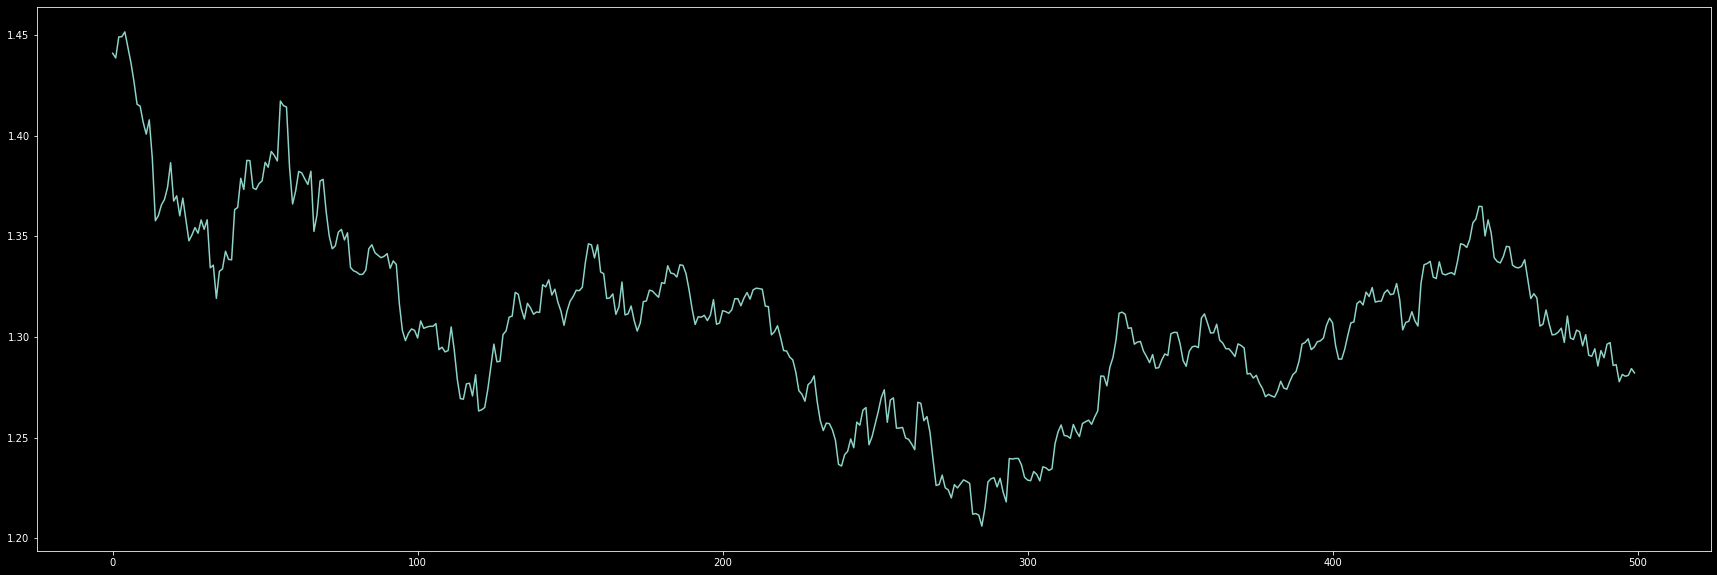

In [19]:
plt.plot(eur[:500])

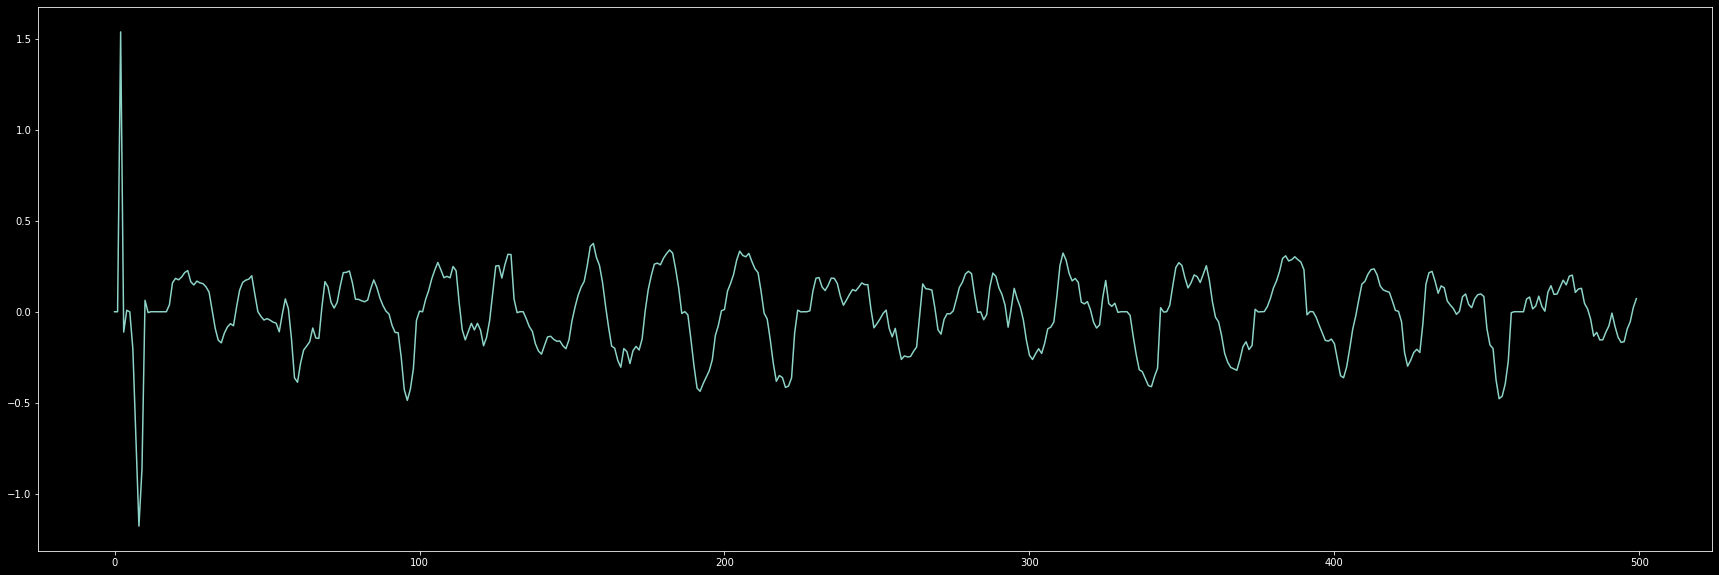

In [20]:
plt.plot(trigger[:500])

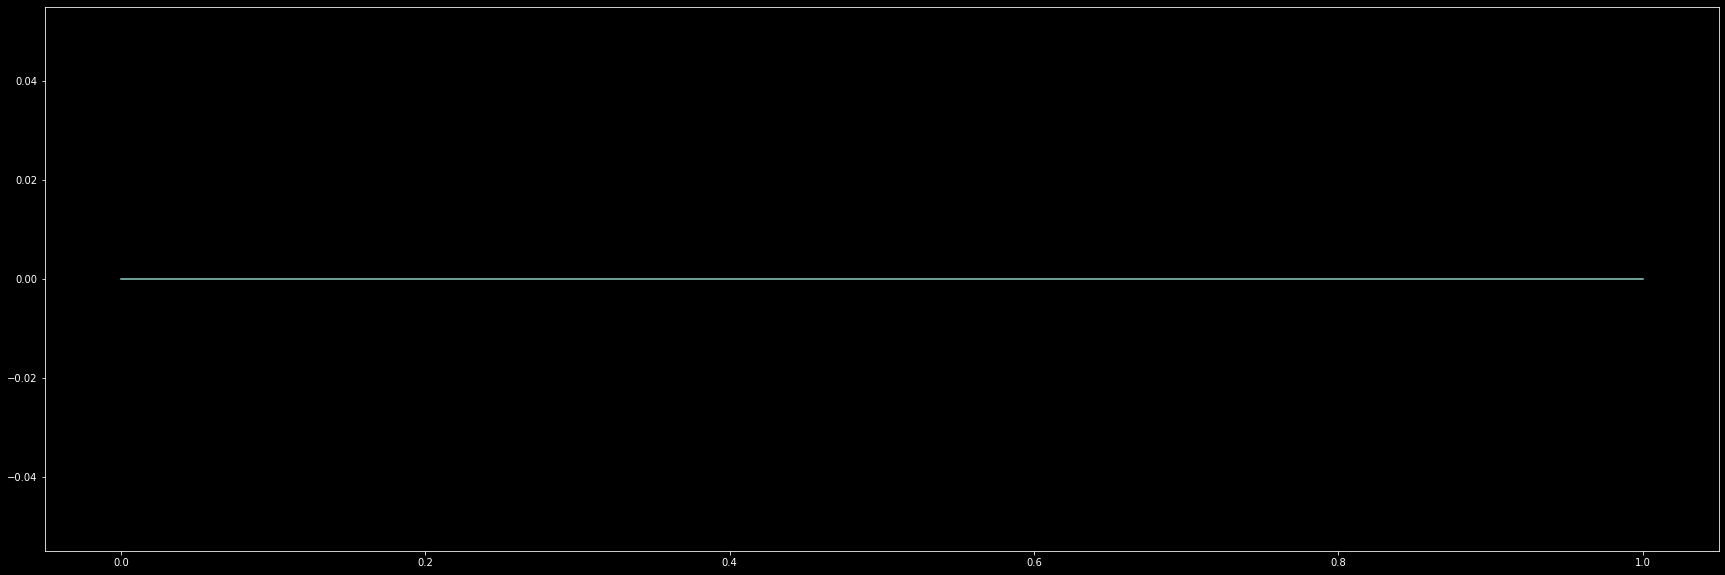

In [102]:
plt.plot(test)

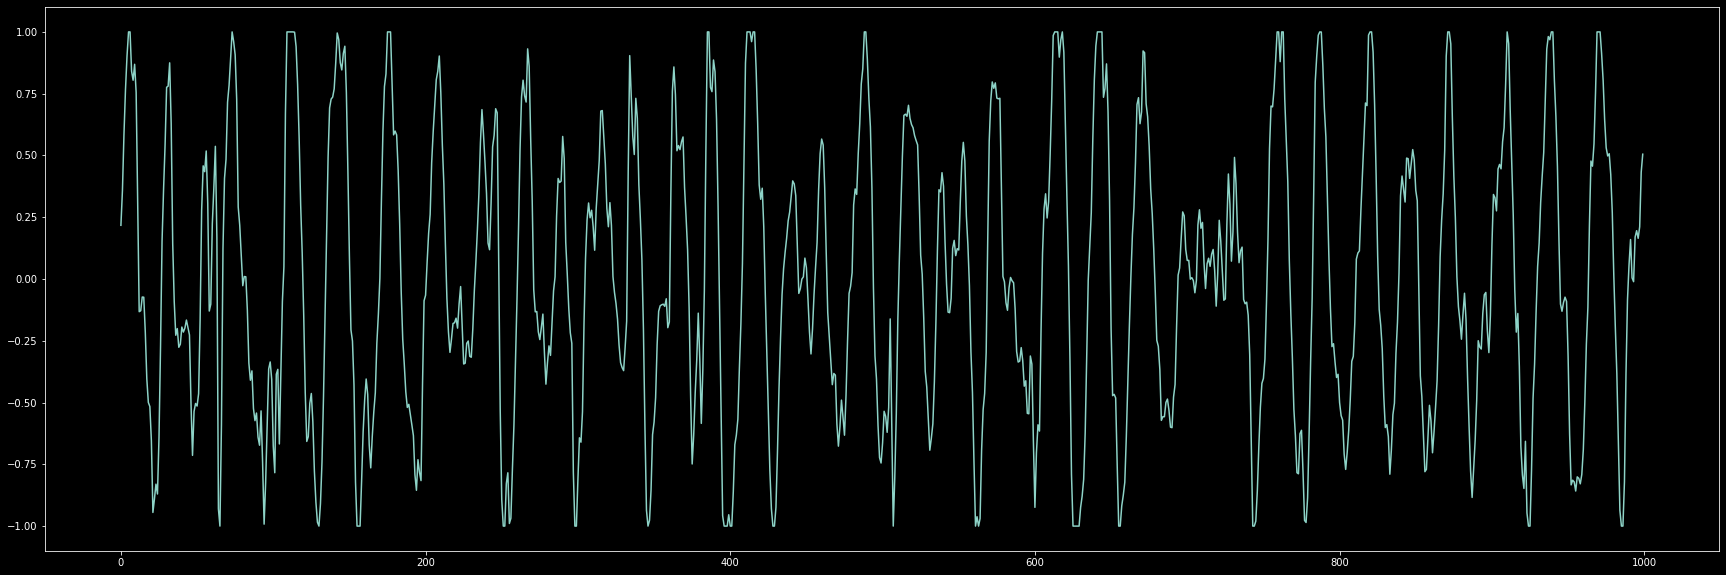

In [29]:
plt.plot(test[1000:2000])

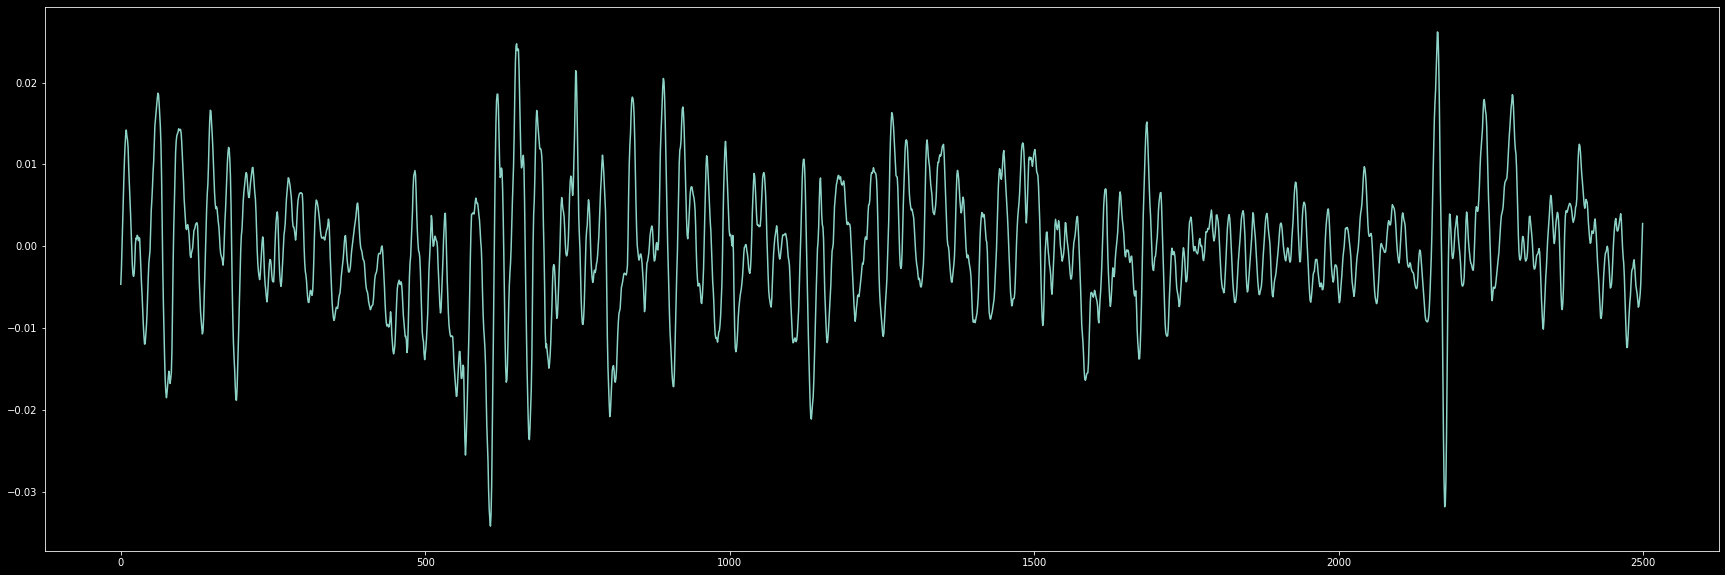

In [56]:
plt.plot(test[500:])

In [15]:
#decycler oscilator
osc_period1 = 30
osc_period2 = 60

alpha1 = (math.cos(math.radians(.707*360 / osc_period1)) + math.sin(math.radians(.707*360 / osc_period1))-1) / math.cos(math.radians(.707*360 / osc_period1))
alpha2 = (math.cos(math.radians(.707*360 / osc_period2)) + math.sin(math.radians(.707*360 / osc_period2))-1) / math.cos(math.radians(.707*360 / osc_period2))
test = []
HP1 = []
HP2 = []
for i in range(len(eur)):
    if i < 2:
        HP1.append(0)
        HP2.append(0)
        continue
    HP1.append((1 - alpha1 / 2)*(1 - alpha1 / 2)*(eur[i] - 2*eur[i-1] + eur[i-2]) + 2*(1 - alpha1)*HP1[i-1] - (1 - alpha1)*(1 - alpha1)*HP1[i-2])
    HP2.append((1 - alpha2 / 2)*(1 - alpha2 / 2)*(eur[i] - 2*eur[i-1] + eur[i-2]) + 2*(1 - alpha2)*HP2[i-1] - (1 - alpha2)*(1 - alpha2)*HP2[i-2])
    test = np.array(HP2) - np.array(HP1)

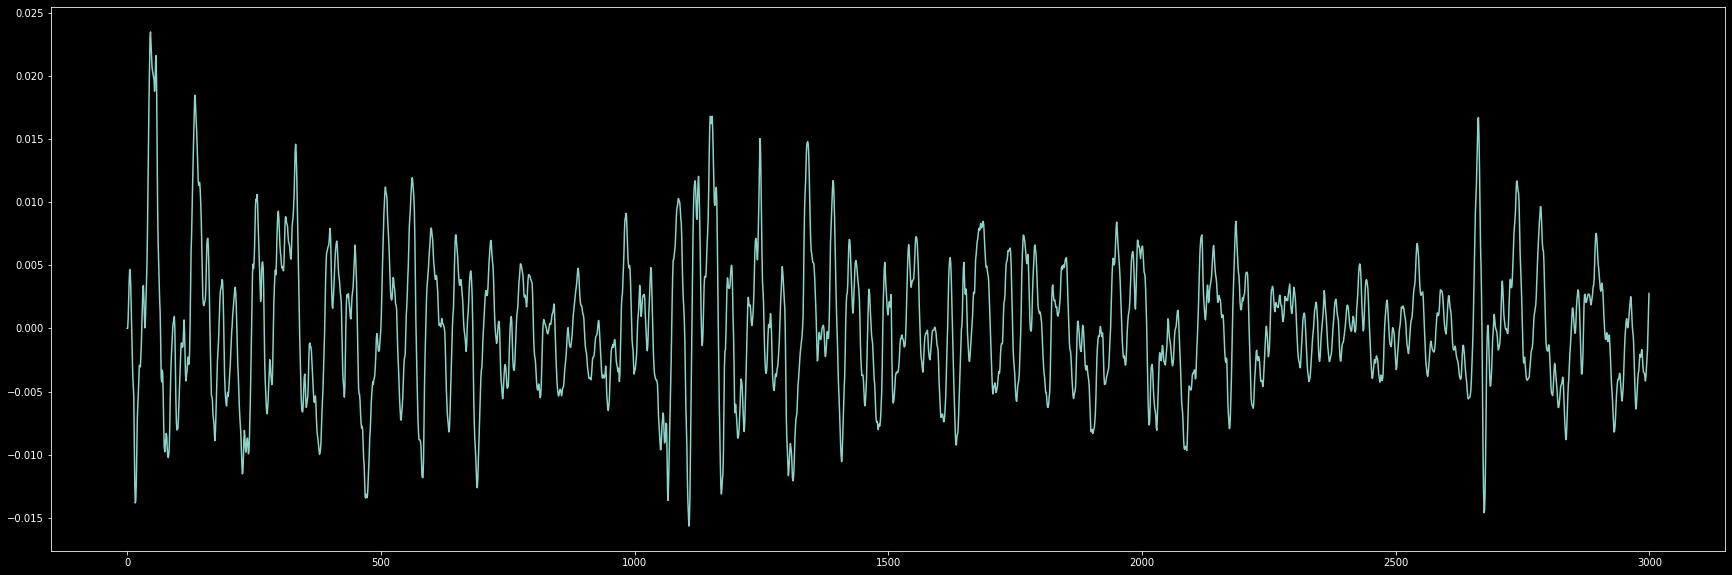

In [17]:
plt.plot(test)

In [13]:
# Decycler
cutoff = 60

alpha1 = (math.cos(math.radians(360 / cutoff)) + math.sin(math.radians(360 / cutoff))-1) / math.cos(math.radians(360 / cutoff))
decycler = []
for i in range(len(eur)):
    if i < 1:
        decycler.append(eur[i])
        continue
    decycler.append((alpha1 / 2)*(eur[i] + eur[i-1]) + (1-alpha1)*decycler[i-1])

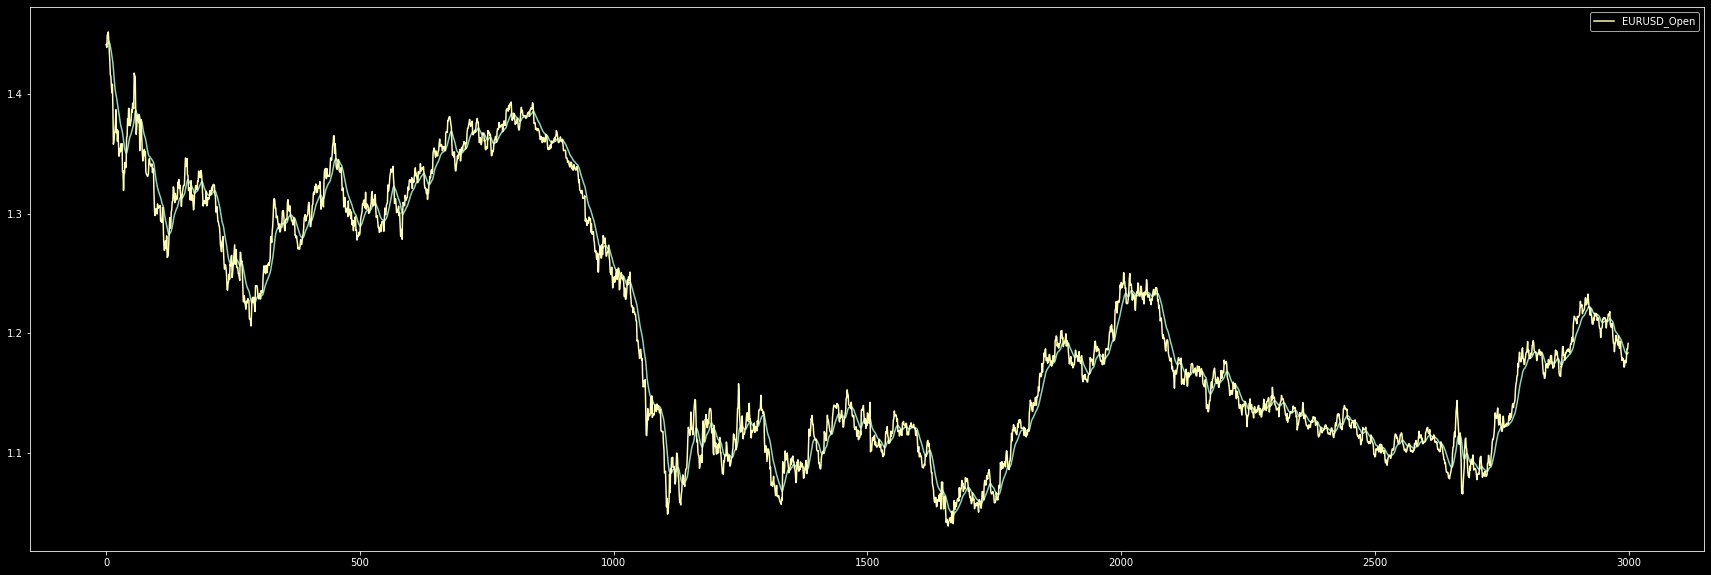

In [14]:
plt.plot(decycler)
robot.get_normal_data()['EURUSD_Open'].plot()
plt.legend()

In [6]:
# dominant cycle measure by zero crossing of the band pass filter
"""
Passar para funçãr e reduzir pela metade o código
a parte do dc fazer por fora
"""
period_1 = 20
bandwidth_1 = .7

period_2 = 30
bandwidth_2 = .5

alpha2_1 = (math.cos(math.radians(.25*bandwidth_1*360/period_1)) + math.sin(math.radians(.25*bandwidth_1*360/period_1))-1) / math.cos(math.radians(.25*bandwidth_1*360/period_1))
alpha2_2 = (math.cos(math.radians(.25*bandwidth_2*360/period_2)) + math.sin(math.radians(.25*bandwidth_2*360/period_2))-1) / math.cos(math.radians(.25*bandwidth_2*360/period_2))

beta1_1 = math.cos(math.radians(360/period_1))
beta1_2 = math.cos(math.radians(360/period_2))

gamma1_1 = 1 / math.cos(math.radians(360*bandwidth_1/period_1))
gamma1_2 = 1 / math.cos(math.radians(360*bandwidth_2/period_2))

alpha1_1 = gamma1_1 - math.sqrt(gamma1_1*gamma1_1-1)
alpha1_2 = gamma1_2 - math.sqrt(gamma1_2*gamma1_2-1)

test_1 = []
test_2 = []
hp_1 = []
hp_2 = []
bp_1 = []
bp_2 = []
peak_1 = []
peak_2 = []
dc = []
counter = 0

for i in range(len(eur)):
    if i < 2:
        test_1.append(0)
        test_2.append(0)
        hp_1.append(0)
        hp_2.append(0)
        peak_1.append(0)
        peak_2.append(0)
        bp_1.append(0)
        bp_2.append(0)
        dc.append(0)
        continue
    hp_1.append((1+alpha2_1 / 2) * (eur[i]-eur[i-1]) + (1-alpha2_1)*hp_1[i-1])
    hp_2.append((1+alpha2_2 / 2) * (eur[i]-eur[i-1]) + (1-alpha2_2)*hp_2[i-1])
    bp_1.append(.5*(1-alpha1_1)*(hp_1[i] - hp_1[i-2]) + beta1_1*(1+alpha1_1) *bp_1[i-1]-alpha1_1*bp_1[i-2])
    bp_2.append(.5*(1-alpha1_2)*(hp_2[i] - hp_2[i-2]) + beta1_2*(1+alpha1_2) *bp_2[i-1]-alpha1_2*bp_2[i-2])
    peak_1.append(.991*peak_1[i-1])
    peak_2.append(.991*peak_2[i-1])
    if abs(bp_1[i]) > peak_1[i]:
        peak_1[i] = abs(bp_1[i])
    if abs(bp_2[i]) > peak_2[i]:
        peak_2[i] = abs(bp_2[i])
        
    if peak_1[i] != 0:
        test_1.append(bp_1[i] / peak_1[i])
    if peak_2[i] != 0:
        test_2.append(bp_2[i] / peak_2[i])
    
    dc.append(dc[i-1])
    
    if dc[i] < 6:
        dc[i] = 6
        
    counter += 1
    
    if test_1[i] > 0 and test_2[i] > 0 and test_1[i] > test_2[i] or test_1[i] < 0 and test_2[i] < 0 and test_1[i] < test_2[i]:
        dc[i] = 2*counter
        if 2*counter > 1.25*dc[i-1]:
            dc[i] = 1.25*dc[i-1]
        elif 2*counter < .8*dc[i-1]:
            dc[i] = .8*dc[i-1]
        counter = 0

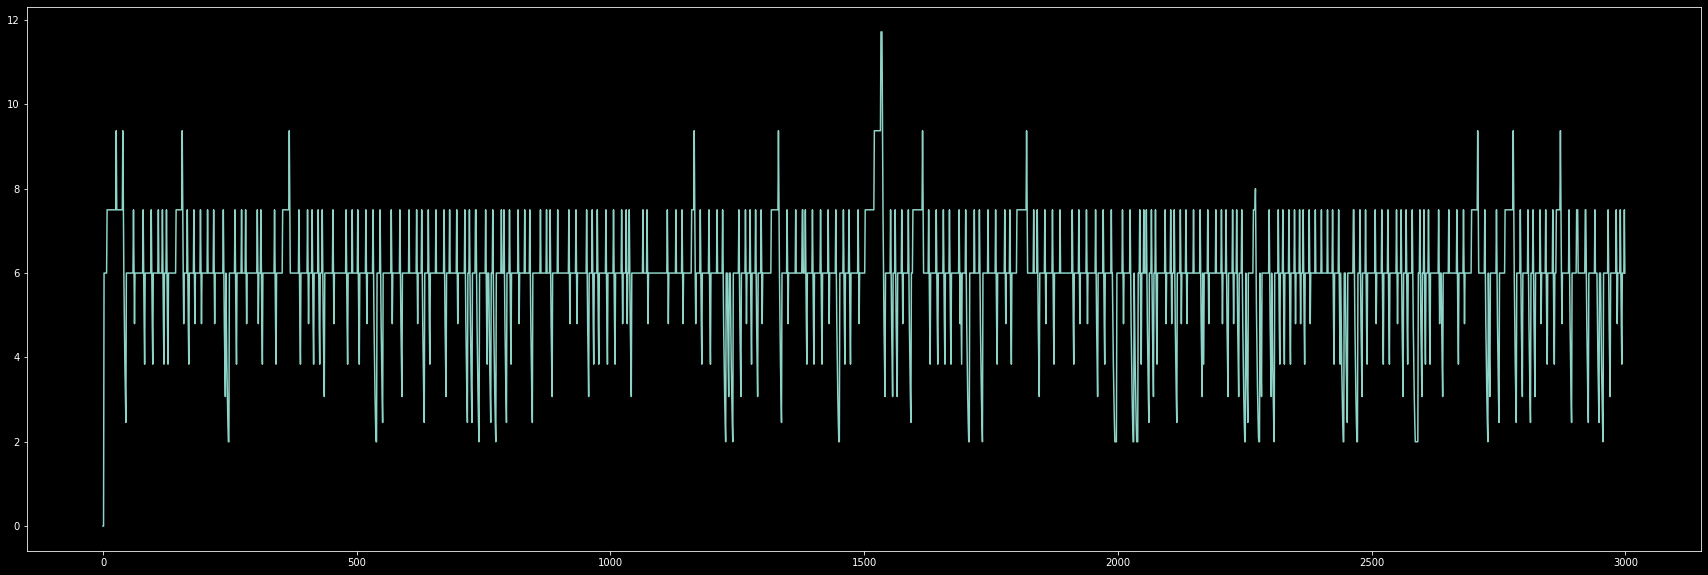

In [7]:
plt.plot(dc)

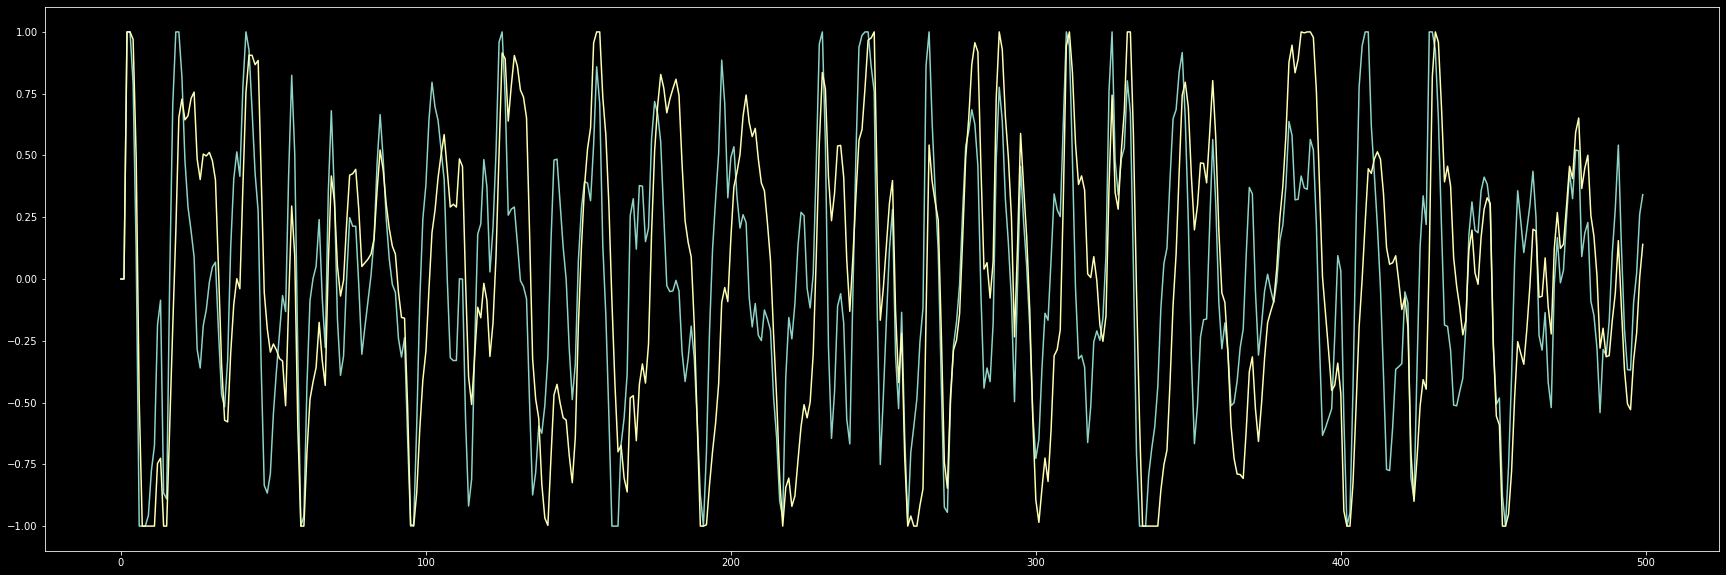

In [118]:
plt.plot(test_1[:500])
plt.plot(test_2[:500])

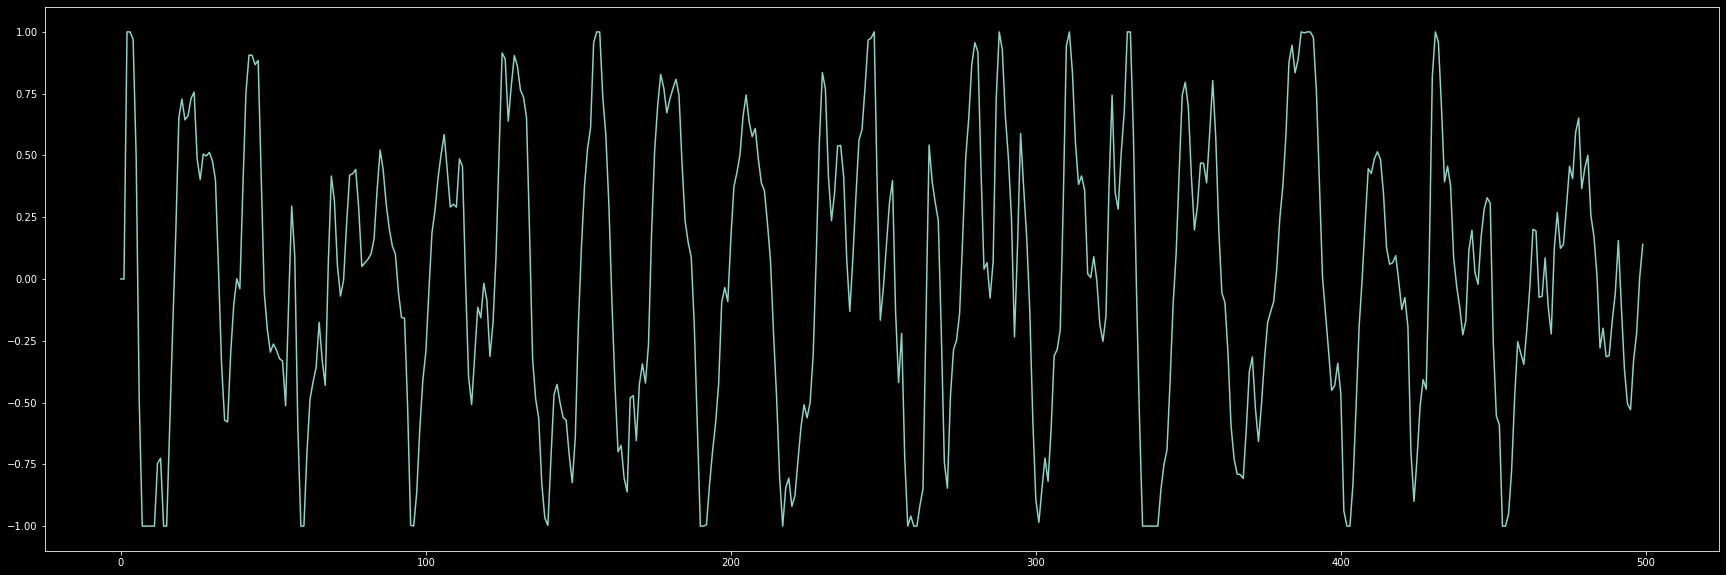

In [120]:
plt.plot(test_2[:500])

In [150]:
# Hurst Coefficient
leng = 30 # tem que ser um numero par

a1 = math.exp(-1.414*3.14159/20)
b1 = 2*a1*math.cos(math.radians(1.414*180/20))
c2 = b1
c3 = -a1*a1
c1 = 1-c2-c3
n3 = (eur.rolling(leng).max() - eur.rolling(leng).min()) / leng
hh = eur.rolling(int(leng / 2 - 1)).max()
ll = eur.rolling(int(leng / 2 - 1)).min()
n1 = (hh-ll) / (leng/2)
hh = []
ll = []
for i in range(len(eur)):
    if i < (leng/2):
        hh.append(np.nan)
        ll.append(np.nan)
        continue
    hh.append(eur[i:int(i+leng-1)].max())
    ll.append(eur[i:int(i+leng-1)].min())
hh = pd.Series(hh)
ll = pd.Series(ll)
n2 = (hh-ll) / (leng/2)

dimen = []
hurst = []
smoothhurst = []
for i in range(len(eur)):
    if i < 1:
        dimen.append(0)
        smoothhurst.append(0)
        hurst.append(0)
        continue
    if n1[i] > 0 and n2[i] > 0 and n3[i] > 0:
        dimen.append(.5*((math.log(n1[i] + n2[i]) - math.log(n3[i]) / math.log(2) + dimen[i-1])))
    else:
        dimen.append(0)
    
    hurst.append(2-dimen[i])
    if i < 2:
        smoothhurst.append(0)
        continue
    smoothhurst.append(c1*(hurst[i]*hurst[i-1]) / 2 + c2*smoothhurst[i-1] + c3*smoothhurst[i-2])

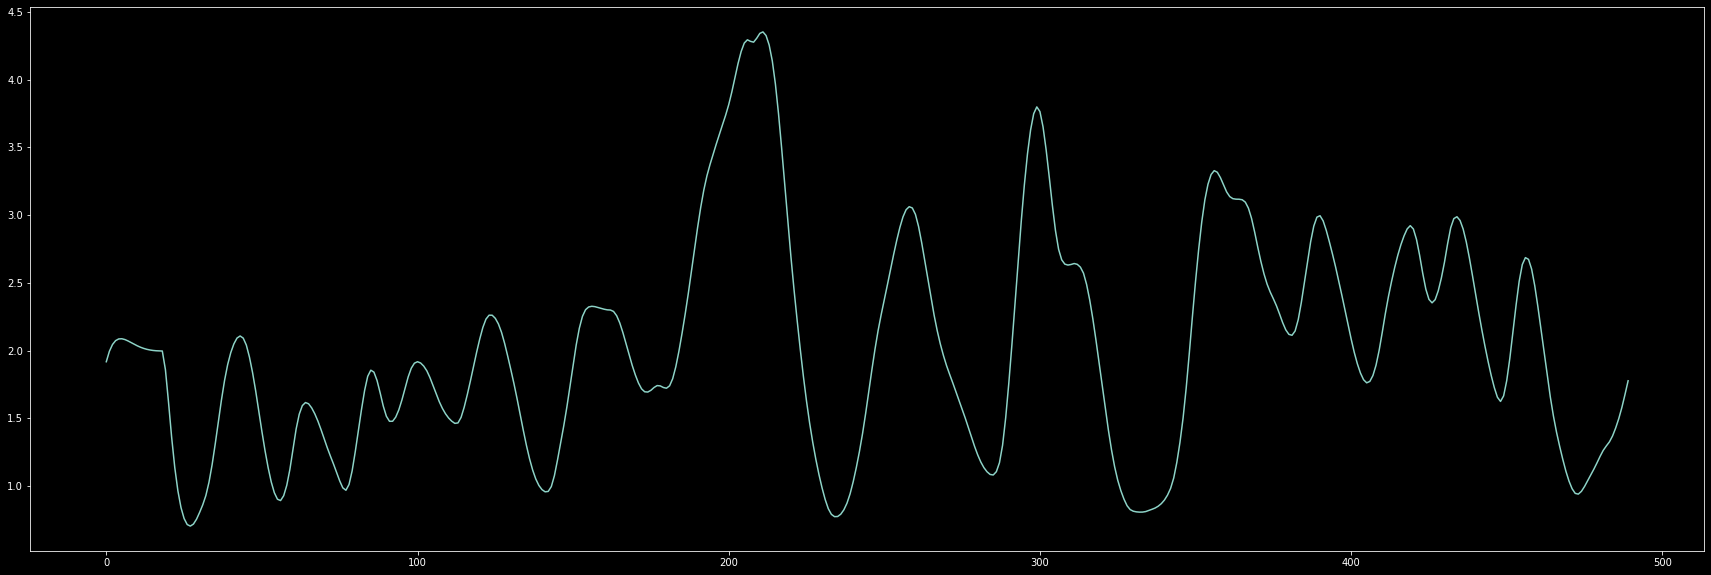

In [153]:
plt.plot(smoothhurst[10:500])

In [162]:
# HP-LP Roofing Filter
period = 48

# Highpass filter cyclic components whose periods are shorter than 48 bars
alpha1 = (math.cos(math.radians(360/period)) + math.sin(math.radians(360/period)) - 1) / math.cos(math.radians(360/period))

# Smooth with a Super Smoother Filter from equation 3-3
a1 = math.exp(-1.414*3.14159/10)
b1 = 2*a1*math.cos(math.radians(1.414*180/10))
c2 = b1
c3 = -a1*a1
c1 = 1-c2-c3

hp = []
filt = []
for i in range(len(eur)):
    if i < 1:
        hp.append(0)
        filt.append(0)
        continue
    hp.append((1-alpha1/2)*(eur[i]-eur[i-1])+(1-alpha1)*hp[i-1])
    if i < 2:
        filt.append(0)
        continue
    filt.append(c1*(hp[i] + hp[i-1])/2+c2*filt[i-1]+c3*filt[i-2])

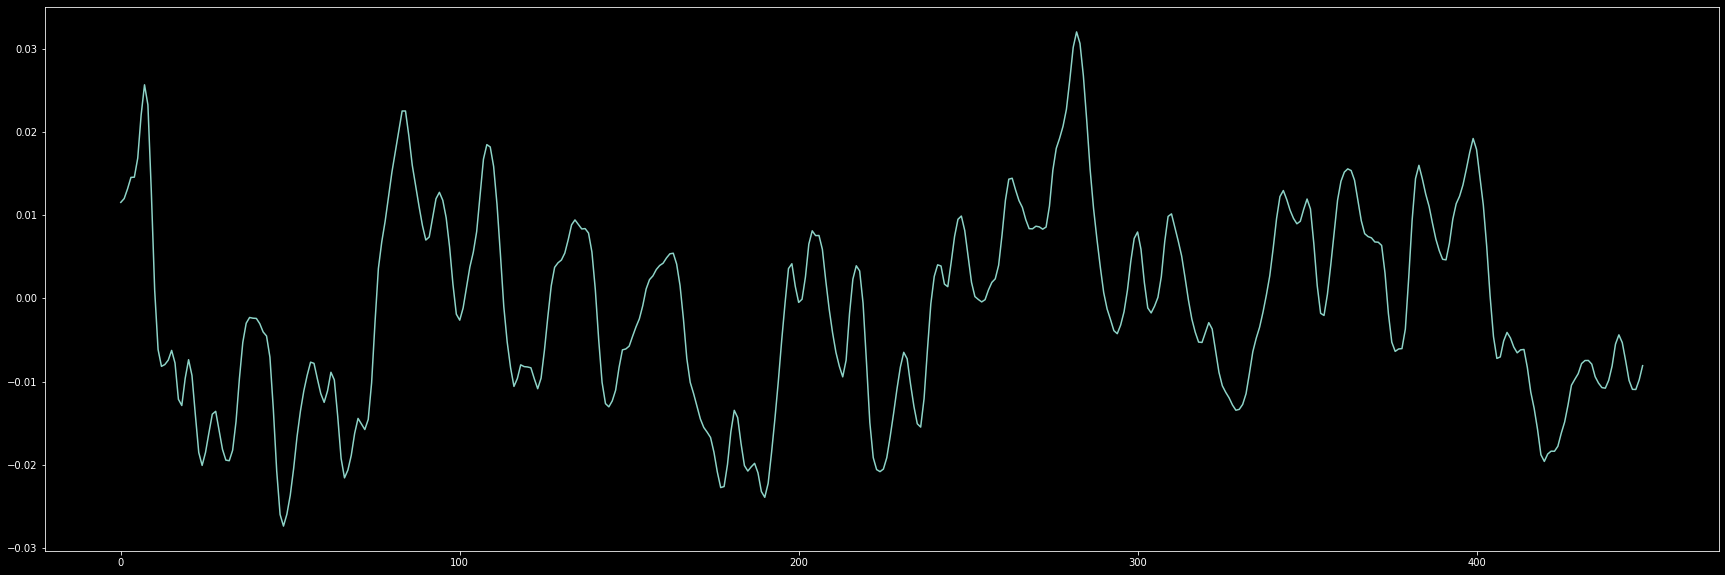

In [165]:
plt.plot(filt[50:500])

In [21]:
# Zero Mean Roofing Filter
period = 48

alpha1 = (math.cos(math.radians(360/period)) + math.sin(math.radians(360/period)) - 1) / math.cos(math.radians(360/period))

a1 = math.exp(-1.414*3.14159/10)
b1 = 2*a1*math.cos(math.radians(1.414*180/10))
c2 = b1
c3 = -a1*a1
c1 = 1-c2-c3

hp = []
filt = []
filt2 = []
for i in range(len(eur)):
    if i < 1:
        hp.append(0)
        filt.append(0)
        filt2.append(0)
        continue
    hp.append((1-alpha1/2)*(eur[i]-eur[i-1])+(1-alpha1)*hp[i-1])
    if i < 2:
        filt.append(0)
        filt2.append(0)
        continue
    filt.append(c1*(hp[i] + hp[i-1])/2+c2*filt[i-1]+c3*filt[i-2])
    filt2.append((1-alpha1/2)*(filt[i]-filt[i-1])+(1-alpha1)*filt2[i-1])

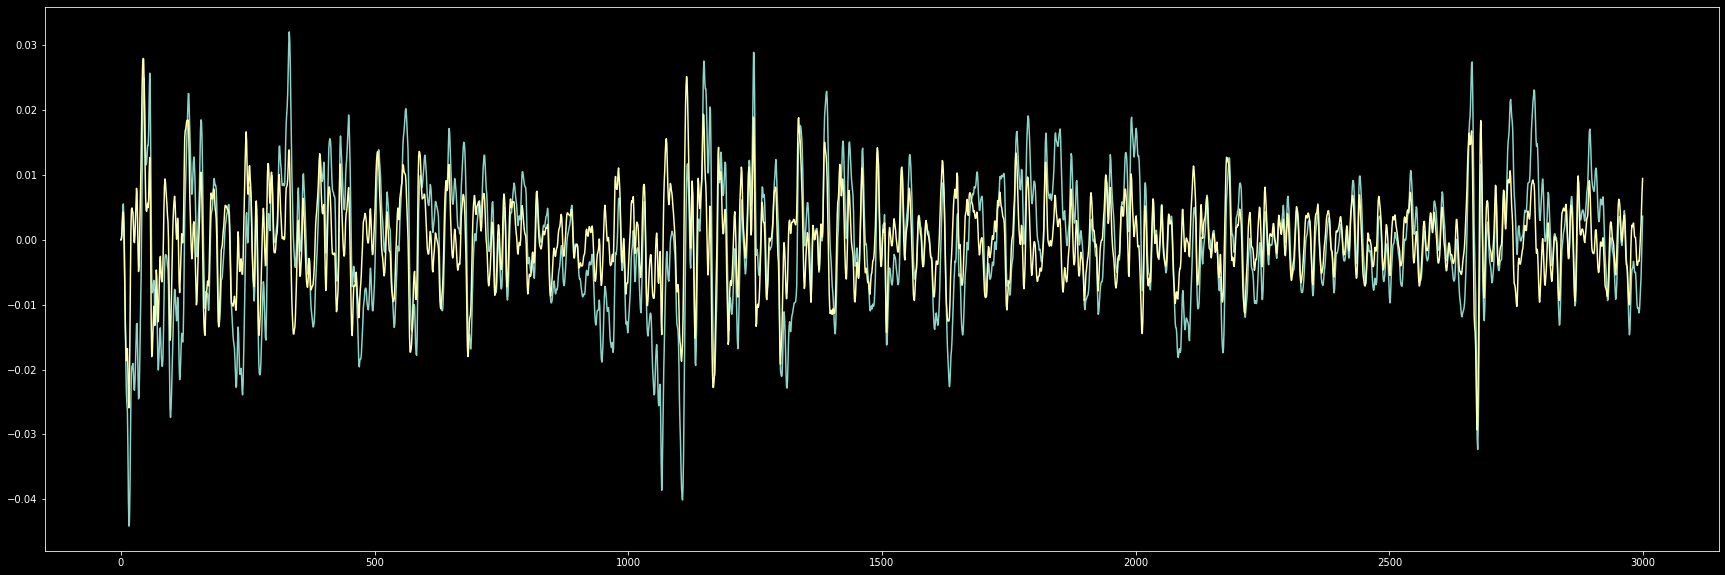

In [22]:
plt.plot(filt)
plt.plot(filt2)

In [35]:
# Roofing Filter Indicator
"""
Usar esse como preço novo e entao calcular o pct change
"""

lpperiod = 40
hpperiod = 80

alpha1 = (math.cos(math.radians(.707*360/hpperiod)) + math.sin(math.radians(.707*360/hpperiod))-1)/math.cos(math.radians(.707*360/hpperiod))
alpha2 = (math.cos(math.radians(.707*360/lpperiod)) + math.sin(math.radians(.707*360/lpperiod))-1)/math.cos(math.radians(.707*360/lpperiod))

a1 = math.exp(-1.414*3.14159/10)
b1 = 2*a1*math.cos(math.radians(1.414*180/10))
c2 = b1
c3 = -a1*a1
c1 = 1-c2-c3

hp = []
filt = []
hp2 = []
filt2 = []
for i in range(len(eur)):
    if i < 2:
        hp.append(0)
        hp2.append(0)
        filt.append(0)
        filt2.append(0)
        continue
    hp.append((1-alpha1/2)*(1-alpha1/2)*(eur[i]-2*eur[i-1]+eur[i-2])+2*(1-alpha1)*hp[i-1]-(1-alpha1)*(1-alpha1)*hp[i-2])
    filt.append(c1*(hp[i] + hp[i-1])/2+c2*filt[i-1]+c3*filt[i-2])
    
    hp2.append((1-alpha2/2)*(1-alpha2/2)*(eur[i]-2*eur[i-1]+eur[i-2])+2*(1-alpha2)*hp2[i-1]-(1-alpha2)*(1-alpha2)*hp2[i-2])
    filt2.append(c1*(hp2[i] + hp2[i-1])/2+c2*filt2[i-1]+c3*filt2[i-2])

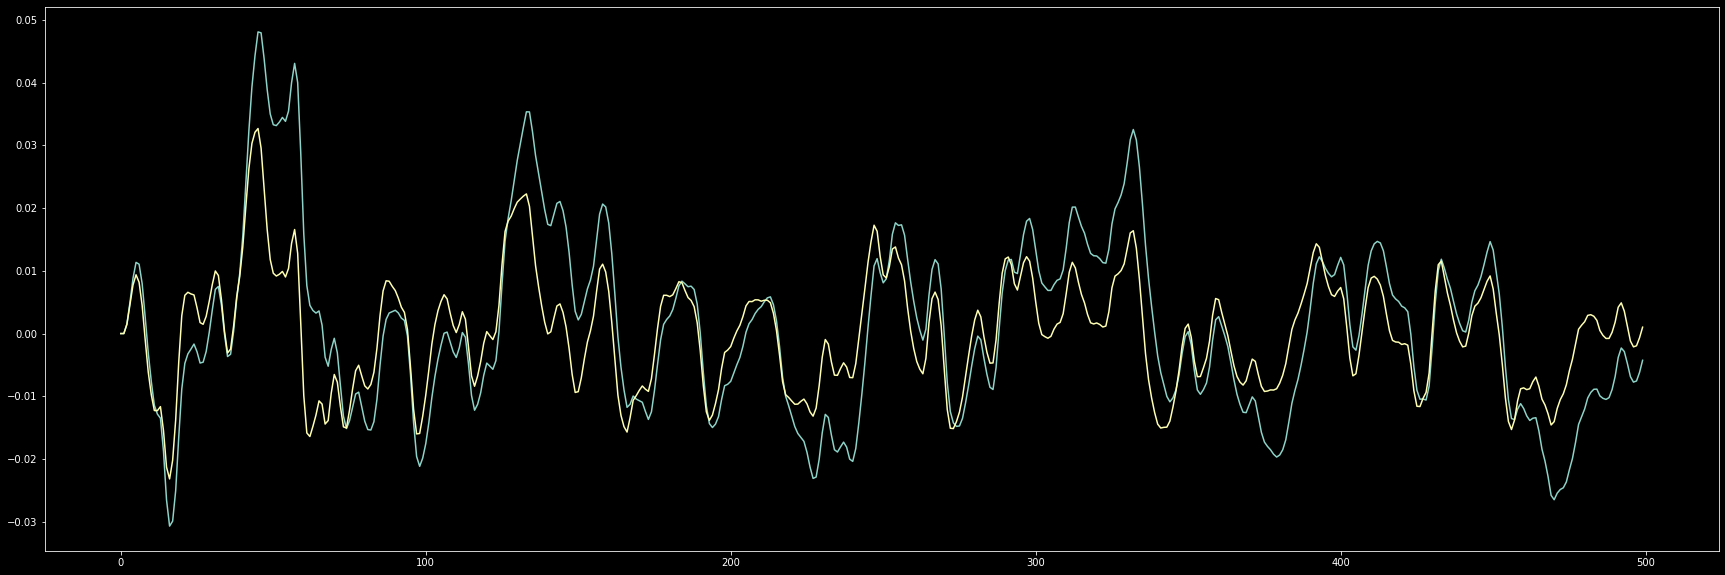

In [36]:
plt.plot(filt[:500])
plt.plot(filt2[:500])

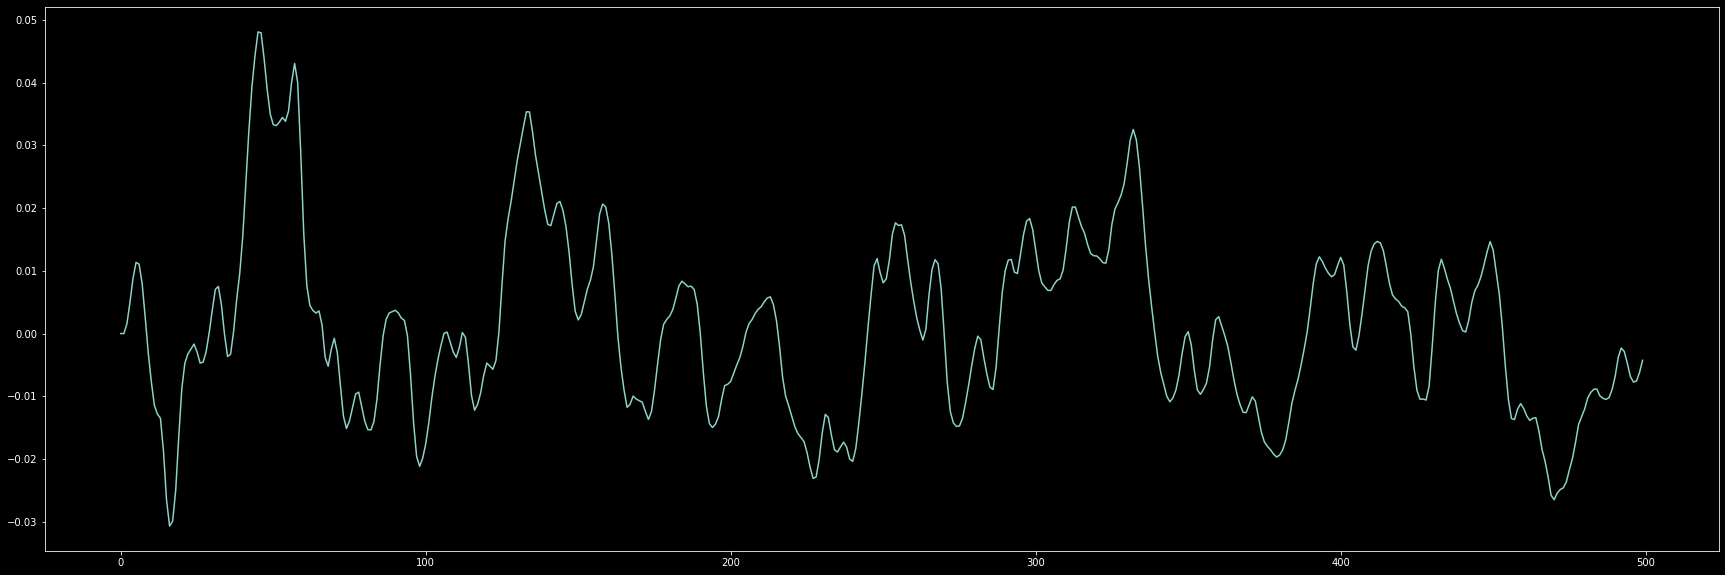

In [44]:
plt.plot(filt[:500])

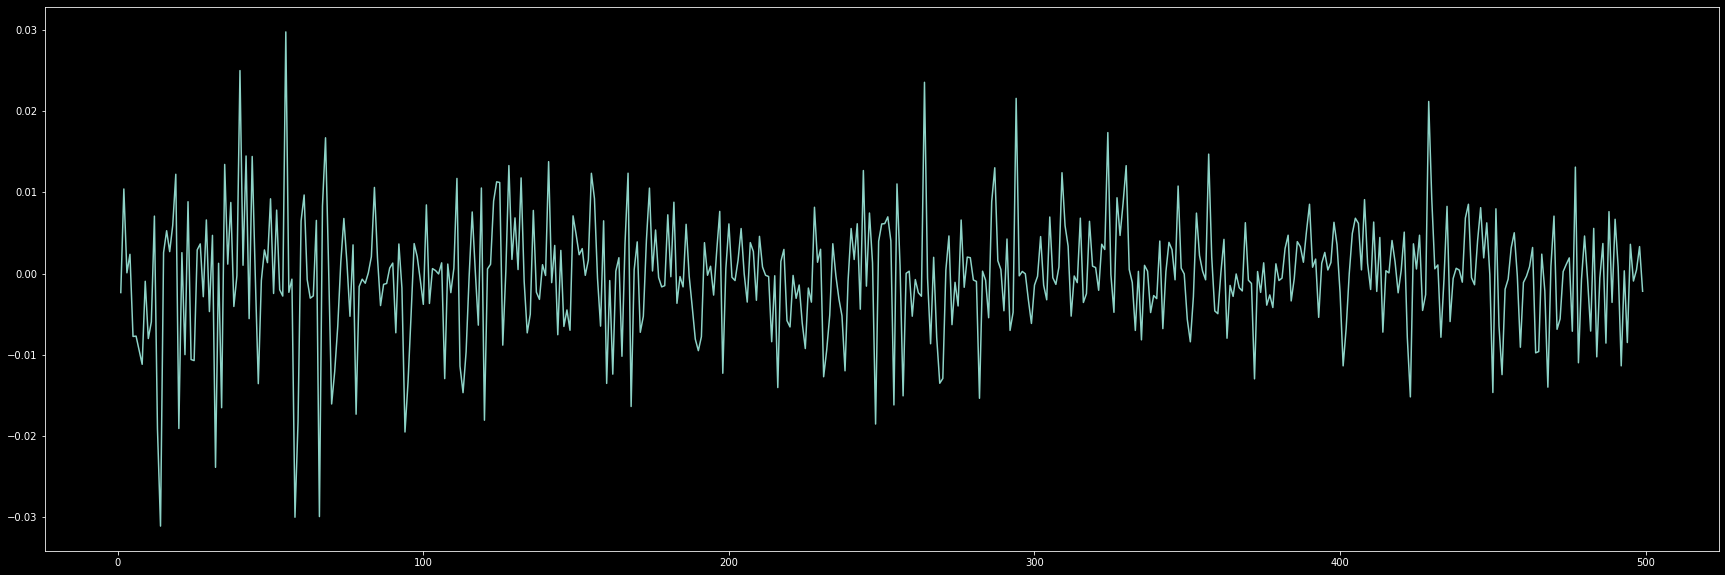

In [47]:
plt.plot(eur.diff()[:500])

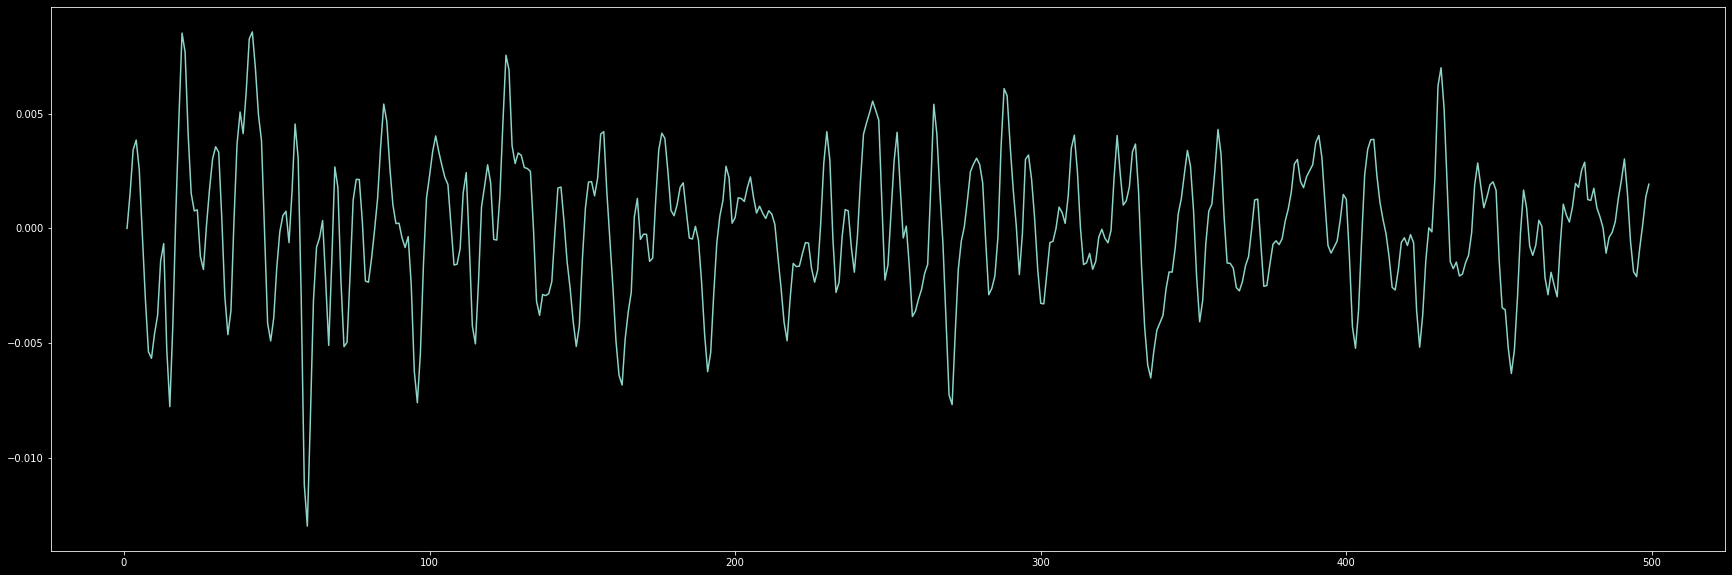

In [48]:
plt.plot(pd.Series(filt).diff()[:500])

In [61]:
# Autocorrelation Indicator
avglength = 0

hpperiod = 48

alpha1 = (math.cos(math.radians(.707*360/hpperiod)) + math.sin(math.radians(.707*360/hpperiod))-1)/math.cos(math.radians(.707*360/hpperiod))

a1 = math.exp(-1.414*3.14159/10)
b1 = 2*a1*math.cos(math.radians(1.414*180/10))
c2 = b1
c3 = -a1*a1
c1 = 1-c2-c3

hp = []
filt = []
filt2 = []
corr = np.zeros(48)
for i in range(len(eur)):
    if i < 2:
        hp.append(0)
        filt.append(0)
        filt2.append(0)
        continue
    hp.append((1-alpha1/2)*(1-alpha1/2)*(eur[i]-2*eur[i-1]+eur[i-2])+2*(1-alpha1)*hp[i-1]-(1-alpha1)*(1-alpha1)*hp[i-2])
    filt.append(c1*(hp[i] + hp[i-1])/2+c2*filt[i-1]+c3*filt[i-2])
    filt2.append((1-alpha1/2)*(filt[i]-filt[i-1])+(1-alpha1)*filt2[i-1])

for lag in range(48):
    m = avglength
    if avglength == 0:
        m = lag
    sx, sy, sxx, syy, sxy = 0, 0, 0, 0, 0
    for count in range(m-1):
        x = filt[count]
        y = filt[lag+count]
        sx += x
        sy += y
        sxx = sxx + x*x
        sxy = sxy + x*y
        syy = syy + y*y
    if ((m*sxx-sx*sx)*(m*syy-sy*sy)) > 0:
        corr[lag] = (m*sxy-sx*sy)/math.sqrt((m*sxx-sx*sx)*(m*syy-sy*sy))
        corr[lag] = .5*(corr[lag]+1)

0
0
1
0
1
2
0
1
2
3
0
1
2
3
4
0
1
2
3
4
5
0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
0
1
2
3
4
5
6
7
8

In [60]:
corr

array([0.        , 0.        , 0.        , 0.        , 0.665571  ,
       0.2171031 , 0.0552739 , 0.04471739, 0.06818988, 0.1407431 ,
       0.12577191, 0.03794589, 0.0878208 , 0.18461225, 0.29764572,
       0.38533319, 0.39501954, 0.34190964, 0.36352541, 0.49457855,
       0.51266   , 0.4435337 , 0.4529199 , 0.47716759, 0.47248333,
       0.4158766 , 0.3225863 , 0.22346389, 0.13765026, 0.08680047,
       0.08312625, 0.10860057, 0.16425226, 0.21202806, 0.25345826,
       0.28689062, 0.31819675, 0.34882439, 0.3692642 , 0.3693823 ,
       0.36124384, 0.35477509, 0.35952348, 0.38713613, 0.44906229,
       0.51786349, 0.57179553, 0.61010918])